In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get the data

In [2]:
df=pd.read_csv('CVD_cleaned.csv')

In [3]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

### Exploratory data analysis

<Axes: >

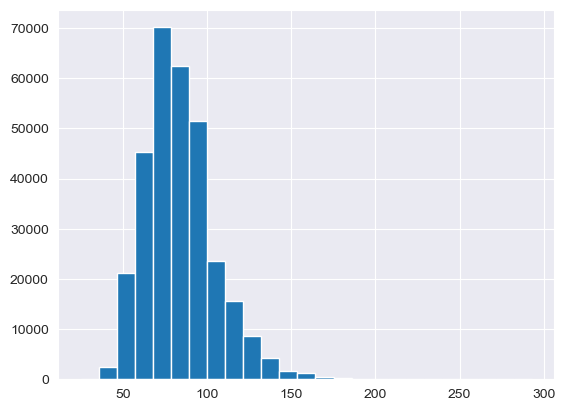

In [6]:
sns.set_style('darkgrid')
df['Weight_(kg)'].hist(bins=25)

<Axes: xlabel='Height_(cm)', ylabel='Weight_(kg)'>

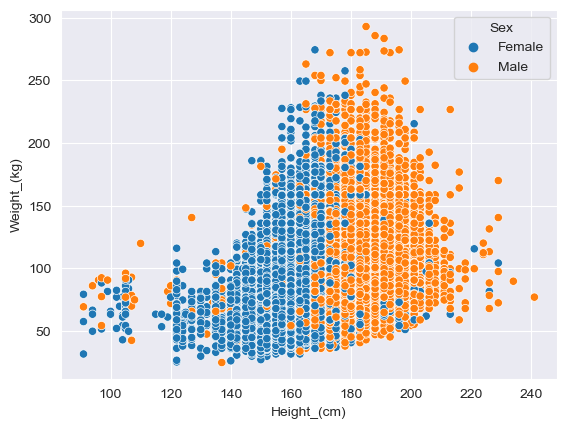

In [7]:
sns.scatterplot(x='Height_(cm)',y='Weight_(kg)',data=df,hue='Sex')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [10]:
X=df[['Height_(cm)','Weight_(kg)','BMI','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']]
y=df['Heart_Disease']

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=101)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

### Predictions and evaluations

In [14]:
predictions = logmodel.predict(X_test)

In [15]:
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test,predictions))

C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          No       0.92      1.00      0.96     93684
         Yes       0.00      0.00      0.00      8238

    accuracy                           0.92    101922
   macro avg       0.46      0.50      0.48    101922
weighted avg       0.84      0.92      0.88    101922



C:\Users\KIIT0001\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
df[df['Heart_Disease']=='Yes'].count()

General_Health                  24971
Checkup                         24971
Exercise                        24971
Heart_Disease                   24971
Skin_Cancer                     24971
Other_Cancer                    24971
Depression                      24971
Diabetes                        24971
Arthritis                       24971
Sex                             24971
Age_Category                    24971
Height_(cm)                     24971
Weight_(kg)                     24971
BMI                             24971
Smoking_History                 24971
Alcohol_Consumption             24971
Fruit_Consumption               24971
Green_Vegetables_Consumption    24971
FriedPotato_Consumption         24971
dtype: int64

In [18]:
df[df['Heart_Disease']=='No'].count()

General_Health                  283883
Checkup                         283883
Exercise                        283883
Heart_Disease                   283883
Skin_Cancer                     283883
Other_Cancer                    283883
Depression                      283883
Diabetes                        283883
Arthritis                       283883
Sex                             283883
Age_Category                    283883
Height_(cm)                     283883
Weight_(kg)                     283883
BMI                             283883
Smoking_History                 283883
Alcohol_Consumption             283883
Fruit_Consumption               283883
Green_Vegetables_Consumption    283883
FriedPotato_Consumption         283883
dtype: int64